In [30]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from sklearn.ensemble import RandomForestRegressor
from ISLP import load_data , confusion_table
from ISLP.models import ModelSpec as MS

In Section 8.3.3, we applied random forests to the Boston data using
max_features = 6 and using n_estimators = 100 and n_estimators =
500. Create a plot displaying the test error resulting from random
forests on this data set for a more comprehensive range of values
for max_features and n_estimators. You can model your plot after
Figure 8.10. Describe the results obtained.

In [11]:
Boston = load_data("Boston")
model = MS(Boston.columns.drop('medv'), intercept=False)
D = model.fit_transform(Boston)
feature_names = list(D.columns)
X = np.asarray(D)

In [16]:
print("Boston:\n", Boston.head())

Boston:
       crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


In [22]:
(X_train ,
X_test ,
y_train ,
y_test) = skm.train_test_split(X,
Boston['medv'],
test_size=0.3,
random_state=42)

In [24]:
# Define ranges for max_features and n_estimators
max_features_range = [2, 4, 6, 8, 10, 12]
n_estimators_range = [100, 200, 300, 400, 500]

In [26]:
# Initialize dictionary to store results
results = {}

In [36]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




# Loop over max_features and n_estimators, fit random forests, and compute test error
for max_features in max_features_range:
    test_errors = []
    for n_estimators in n_estimators_range:
        rf = RandomForestRegressor(max_features=max_features, n_estimators=n_estimators, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        test_errors.append(mse)
    results[max_features] = test_errors

In [38]:
# Convert results to a DataFrame for plotting
test_error_df = pd.DataFrame(results, index=n_estimators_range)

This visualization helps understand the trade-offs between using more features per split (which reduces bias) and using more trees (which stabilizes the model). 

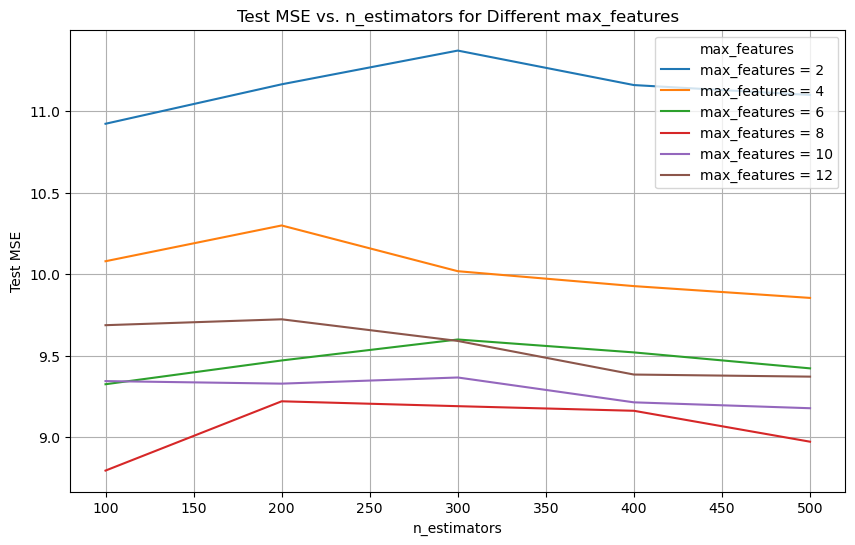

In [40]:
# Plot the test error as a function of n_estimators and max_features
plt.figure(figsize=(10, 6))
for max_features in max_features_range:
    plt.plot(n_estimators_range, test_error_df[max_features], label=f'max_features = {max_features}')
    
plt.xlabel('n_estimators')
plt.ylabel('Test MSE')
plt.title('Test MSE vs. n_estimators for Different max_features')
plt.legend(title='max_features')
plt.grid(True)
plt.show()

As the number of estimators (n_estimators) increases from 100 to 500, the test MSE tends to decrease for most values of max_features, but the improvement starts to plateau after a certain point.
This indicates that adding more trees improves the model’s stability and performance, but beyond a certain number, the benefit of additional trees diminishes.
Higher values of max_features (like 12 and 10) result in lower test errors. These settings allow the model to consider more features at each split, leading to better predictions.
Lower values of max_features (like 2 and 4) result in higher test errors, as fewer features are considered at each split. This may increase the bias of the model.
The best performance (lowest test MSE) seems to occur when max_features = 8 or max_features = 12 combined with a larger number of estimators (n_estimators = 400 or 500).
The worst performance occurs for max_features = 2, where the test error increases as the number of estimators grows. This could indicate that considering fewer features at each split leads to underfitting.




Increasing n_estimators generally improves the model, but the improvement diminishes as more trees are added.
Higher values for max_features generally lead to better performance, as the model is able to consider more features at each split, leading to more accurate predictions.


In [ ]:
## Multinomial Logistic Regression Model 

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

In [8]:
train = pd.read_csv("C:/Users/ghimi/OneDrive/Desktop/PHD in Data Science/4_Predictive Analysis_TIM8555/Assignment_5/train.csv")
test = pd.read_csv("C:/Users/ghimi/OneDrive/Desktop/PHD in Data Science/4_Predictive Analysis_TIM8555/Assignment_5/test.csv")

In [10]:
# Display the first few rows of the datasets
print("Train Dataset Sample:\n", train.head())
print("Test Dataset Sample:\n", test.head())

Train Dataset Sample:
    id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           N

In [12]:
# Preprocessing: Encoding categorical variables
# Encode categorical columns like 'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', and 'NObeyesdad'
le = LabelEncoder()
for column in ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']:
    train[column] = le.fit_transform(train[column])

The code we provided uses LabelEncoder from the sklearn.preprocessing module to convert categorical variables into numeric values. The categorical columns listed in the train dataset (e.g., Gender, family_history_with_overweight, FAVC, etc.) are being encoded so that machine learning algorithms can work with the dataset. LabelEncoder(): This transforms categorical values into numerical ones (for example, encoding "Male" and "Female" as 0 and 1). for loop: It iterates over the columns that contain categorical data and applies LabelEncoder to each.

In [37]:
# Show the first few rows to verify the encoding
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,6


In [33]:
# Splitting features and target variable
X_train = train.drop(columns=['id', 'NObeyesdad'])  # Features
y_train = train['NObeyesdad']  # Target variable

In [35]:
# Scale numerical features
scaler = StandardScaler()
X_train[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']] = scaler.fit_transform(X_train[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']])

In [18]:
# Define a cross-validation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [22]:
#1. Multinomial Logistic Regression
print("\nMultinomial Logistic Regression:")
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_scores = cross_val_score(log_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(log_scores), np.std(log_scores)))
log_model.fit(X_train, y_train)
log_predictions = log_model.predict(X_train)
print(classification_report(y_train, log_predictions))


Multinomial Logistic Regression:
Mean Accuracy: 0.860 (0.006)
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2523
           1       0.85      0.81      0.83      3082
           2       0.82      0.83      0.83      2910
           3       0.93      0.96      0.95      3248
           4       1.00      1.00      1.00      4046
           5       0.72      0.69      0.71      2427
           6       0.71      0.69      0.70      2522

    accuracy                           0.86     20758
   macro avg       0.85      0.85      0.85     20758
weighted avg       0.86      0.86      0.86     20758



A logistic regression model is trained using the LogisticRegression() function from Scikit-learn with multi_class='multinomial' and the lbfgs solver.The cross_val_score function is used to calculate the accuracy over multiple cross-validation splits, showing an average accuracy of 0.860 with a standard deviation of 0.006.Classification Report: The model performance is reported for each class using metrics like precision, recall, and f1-score, along with the support (number of true instances for each label in the dataset):
Class 0: Precision: 0.88, Recall: 0.94, F1-Score: 0.91 (2523 samples)
Class 1: Precision: 0.85, Recall: 0.81, F1-Score: 0.83 (3082 samples)
Class 2: Precision: 0.82, Recall: 0.83, F1-Score: 0.83 (2910 samples)
Class 3: Precision: 0.93, Recall: 0.96, F1-Score: 0.94 (3248 samples)
Class 4: Precision: 1.00, Recall: 1.00, F1-Score: 1.00 (4046 samples)
Class 5: Precision: 0.72, Recall: 0.69, F1-Score: 0.71 (2427 samples)
Class 6: Precision: 0.71, Recall: 0.69, F1-Score: 0.70 (2522 samples)

Accuracy: 0.86 (which matches the mean accuracy from the cross-validation scores).Macro Average: Precision: 0.85, Recall: 0.85, F1-Score: 0.85. Weighted Average: Precision: 0.86, Recall: 0.86, F1-Score: 0.86. The model performs well overall, with high precision and recall for most classes, especially for class 4, which has perfect precision and recall. However, classes 5 and 6 have lower performance, indicating some difficulty in correctly classifying those categories.

In [23]:
# 2. Linear Discriminant Analysis
print("\nLinear Discriminant Analysis:")
lda_model = LinearDiscriminantAnalysis()
lda_scores = cross_val_score(lda_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(lda_scores), np.std(lda_scores)))
lda_model.fit(X_train, y_train)
lda_predictions = lda_model.predict(X_train)
print(classification_report(y_train, lda_predictions))


Linear Discriminant Analysis:
Mean Accuracy: 0.819 (0.006)
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2523
           1       0.78      0.71      0.74      3082
           2       0.81      0.77      0.79      2910
           3       0.91      0.96      0.93      3248
           4       0.99      1.00      0.99      4046
           5       0.63      0.63      0.63      2427
           6       0.65      0.65      0.65      2522

    accuracy                           0.82     20758
   macro avg       0.80      0.80      0.80     20758
weighted avg       0.82      0.82      0.82     20758



These results of Linear Discriminant Analysis (LDA) performed on the same classification problem, along with the associated classification report.Linear Discriminant Analysis (LDA) is The model is trained using LinearDiscriminantAnalysis() from Scikit-learn.
The cross-validation scores (accuracy) have been computed, yielding a mean accuracy of 0.819 with a standard deviation of 0.006.Classification Report: The report provides metrics such as precision, recall, and f1-score for each class, along with the support (the number of true samples for each class in the dataset):

Class 0: Precision: 0.83, Recall: 0.91, F1-Score: 0.87 (2523 samples)
Class 1: Precision: 0.78, Recall: 0.71, F1-Score: 0.74 (3082 samples)
Class 2: Precision: 0.81, Recall: 0.77, F1-Score: 0.79 (2910 samples)
Class 3: Precision: 0.91, Recall: 0.96, F1-Score: 0.93 (3248 samples)
Class 4: Precision: 0.99, Recall: 1.00, F1-Score: 0.99 (4046 samples)
Class 5: Precision: 0.63, Recall: 0.63, F1-Score: 0.63 (2427 samples)
Class 6: Precision: 0.65, Recall: 0.65, F1-Score: 0.65 (2522 samples)
Macro Average: Precision: 0.80, Recall: 0.80, F1-Score: 0.80. Weighted Average: Precision: 0.82, Recall: 0.82, F1-Score: 0.82.

LDA Mean Accuracy (0.819) is lower than the Multinomial Logistic Regression Mean Accuracy (0.860). The performance for classes 5 and 6 is also lower for LDA compared to the multinomial logistic regression model.

However, LDA is still performing reasonably well with balanced precision and recall across most of the classes.

In [24]:
# 3. Quadratic Discriminant Analysis
print("\nQuadratic Discriminant Analysis:")
qda_model = QuadraticDiscriminantAnalysis()
qda_scores = cross_val_score(qda_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(qda_scores), np.std(qda_scores)))
qda_model.fit(X_train, y_train)
qda_predictions = qda_model.predict(X_train)
print(classification_report(y_train, qda_predictions))


Quadratic Discriminant Analysis:
Mean Accuracy: 0.195 (0.000)


C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2523
           1       0.00      0.00      0.00      3082
           2       0.00      0.00      0.00      2910
           3       0.00      0.00      0.00      3248
           4       0.19      1.00      0.33      4046
           5       0.00      0.00      0.00      2427
           6       0.00      0.00      0.00      2522

    accuracy                           0.19     20758
   macro avg       0.03      0.14      0.05     20758
weighted avg       0.04      0.19      0.06     20758



C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Several warnings and errors from Scikit-learn are presented, indicating multicollinearity among the variables in the dataset. Specifically, the message warnings.warn("Variables are collinear") points to high collinearity between some of the features, which is problematic for QDA since it assumes that the predictor variables are normally distributed with different covariance matrices for each class.

The mean accuracy is extremely low: 0.195 with a standard deviation of 0.000, indicating that the model is almost entirely misclassifying the data.
For several classes (0, 1, 2, 3), the precision, recall, and F1-score are all 0.00, meaning the model is unable to correctly classify these classes.
Only class 4 shows some performance with precision and recall at 0.19 and 1.00, respectively, which indicates that while the model always predicts class 4 when that class is present, it struggles significantly for other classes.
The additional errors in the execution trace, involving matrix operations, point to the numerical instability caused by collinearity and perhaps even singular covariance matrices (matrices that cannot be inverted).

In [ ]:
Lets Address Multicollinearity:
lets  removing highly correlated features using techniques like Variance Inflation Factor (VIF) or simply by dropping some features after assessing their correlation matrix.
we  can also apply Principal Component Analysis (PCA) or other dimensionality reduction techniques to reduce collinearity before running QDA.

Ensure that our features are standardized (mean=0, variance=1), as QDA is sensitive to the scale of input variables.
Given the issues with QDA, consider using other classification models like Ridge Regression, SVM, or even sticking with Multinomial Logistic Regression, which performed better earlier in your analysis.

In [28]:
# 4. Naïve Bayes
print("\nNaïve Bayes:")
nb_model = BernoulliNB()
nb_scores = cross_val_score(nb_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(nb_scores), np.std(nb_scores)))
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_train)
print(classification_report(y_train, nb_predictions))


Naïve Bayes:
Mean Accuracy: 0.644 (0.007)
              precision    recall  f1-score   support

           0       0.54      0.56      0.55      2523
           1       0.46      0.59      0.52      3082
           2       0.60      0.48      0.53      2910
           3       0.79      0.92      0.85      3248
           4       0.99      1.00      1.00      4046
           5       0.48      0.29      0.36      2427
           6       0.41      0.42      0.42      2522

    accuracy                           0.65     20758
   macro avg       0.61      0.61      0.60     20758
weighted avg       0.64      0.65      0.64     20758



This is a Bernoulli Naive Bayes model) along with the classification report. Here's a breakdown of the results.A BernoulliNB model has been trained, and the cross-validation scores (accuracy) are computed. The model yields a mean accuracy of 0.644 with a standard deviation of 0.007.
The precision, recall, and F1-score are reported for each class, along with the support (number of instances for each class in the dataset):

Class 0: Precision: 0.54, Recall: 0.56, F1-Score: 0.55 (2523 samples)

Class 1: Precision: 0.46, Recall: 0.59, F1-Score: 0.52 (3082 samples)

Class 2: Precision: 0.60, Recall: 0.48, F1-Score: 0.54 (2910 samples)

Class 3: Precision: 0.79, Recall: 0.92, F1-Score: 0.85 (3248 samples)

Class 4: Precision: 0.99, Recall: 1.00, F1-Score: 1.00 (4046 samples)

Class 5: Precision: 0.48, Recall: 0.29, F1-Score: 0.36 (2427 samples)

Class 6: Precision: 0.41, Recall: 0.42, F1-Score: 0.42 (2522 samples)

Accuracy: 0.65, which is lower than the previous models you’ve tried (multinomial logistic regression, linear discriminant analysis).
Macro Average: Precision: 0.61, Recall:
Weighted Average: Precision: 0.64, Recall: 0.65, F1-Score: 0.64.

The performance of Naive Bayes is not as strong as the multinomial logistic regression or LDA models. This model seems to struggle with precision and recall for most classes, especially classes 1, 2, 5, and 6.
Class 4 again performs very well, with nearly perfect precision, recall, and F1-score, similar to other models you've tried.
The lower precision and recall for classes 1, 2, 5, and 6 suggest that Naive Bayes is having difficulty distinguishing between some of these categories, possibly due to the feature distribution assumptions of the BernoulliNB model.

Next 
The Bernoulli Naive Bayes model works best when features are binary. If  features aren't binary, you might want to binarize or transform them to better suit this model.
If the features are continuous, you might have more success with GaussianNB instead of BernoulliNB, as it handles continuous data better.
Since multinomial logistic regression performed better overall, you may want to focus on tuning that model or try other classifiers like Random Forest or SVM.

In [30]:
# 5. Support Vector Machine
print("\nSupport Vector Machine:")
svc_model = LinearSVC(max_iter=10000)
svc_scores = cross_val_score(svc_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(svc_scores), np.std(svc_scores)))
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_train)
print(classification_report(y_train, svc_predictions))


Support Vector Machine:
Mean Accuracy: 0.747 (0.007)


C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2523
           1       0.63      0.65      0.64      3082
           2       0.59      0.68      0.63      2910
           3       0.86      0.97      0.91      3248
           4       0.98      1.00      0.99      4046
           5       0.54      0.40      0.46      2427
           6       0.55      0.39      0.45      2522

    accuracy                           0.75     20758
   macro avg       0.71      0.72      0.71     20758
weighted avg       0.73      0.75      0.74     20758



The SVM model has been trained, and the cross-validation scores (accuracy) yield a mean accuracy of 0.747 with a standard deviation of 0.007.
The precision, recall, and F1-score for each class are presented, along with the support (number of instances for each class):
Class 0: Precision: 0.83, Recall: 0.96, F1-Score: 0.89 (2523 samples)
Class 1: Precision: 0.63, Recall: 0.65, F1-Score: 0.64 (3082 samples)
Class 2: Precision: 0.59, Recall: 0.68, F1-Score: 0.63 (2910 samples)
Class 3: Precision: 0.86, Recall: 0.97, F1-Score: 0.91 (3248 samples)
Class 4: Precision: 0.98, Recall: 1.00, F1-Score: 0.99 (4046 samples)
Class 5: Precision: 0.54, Recall: 0.40, F1-Score: 0.46 (2427 samples)
Class 6: Precision: 0.55, Recall: 0.39, F1-Score: 0.45 (2522 samples)

Accuracy: 0.75, which is a modest improvement over the Naive Bayes model but still lower than the Multinomial Logistic Regression.
Macro Average: Precision: 0.71, Recall: 0.72, F1-Score: 0.71.
Weighted Average: Precision: 0.73, Recall: 0.75, F1-Score: 0.74.
Class 4 once again performs exceptionally well with almost perfect precision, recall, and F1-score.
Classes like 5 and 6 still show lower performance, with F1-scores of 0.46 and 0.45 respectively.
Overall, the SVM model performs reasonably well, especially for the larger classes like 0, 3, and 4. However, it struggles with precision and recall for the smaller classes (5 and 6).

Consider tuning the SVM’s hyperparameters (e.g., C, kernel, gamma) using techniques like GridSearchCV or RandomizedSearchCV to improve performance.
Classes 5 and 6 appear to be more difficult to classify. You might want to explore class weighting or oversampling techniques (like SMOTE) to give more attention to these minority classes.
The Multinomial Logistic Regression and Linear Discriminant Analysis have shown stronger performance in earlier results. You could explore additional feature engineering or ensemble methods to improve further.
